# AUTISM PREDICTION MODEL
Autism is a neurological disorder that affects a person’s ability to interact with others, make eye contact with others, learn capacity, and other behavioral and social capabilities of a person.

But there is no ascertain way to tell whether a person has Autism or not because there are no such diagnostics methods available to diagnose this disorder. But what if we use machine learning to predict whether a person suffers from Autism or not? This is exactly what we’ll be learning in this article.

In [66]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [67]:
df = pd.read_csv('/content/data_csv.csv')
df.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,...,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,...,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,...,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,...,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,...,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [68]:
df.shape

(1985, 28)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,993.000000,573.164462,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,0.299244,0.458042,0.0,0.0,0.0,1.0,1.0
A2,1985.0,0.238287,0.426143,0.0,0.0,0.0,0.0,1.0
A3,1985.0,0.213098,0.409600,0.0,0.0,0.0,0.0,1.0
A4,1985.0,0.272040,0.445123,0.0,0.0,0.0,1.0,1.0
A5,1985.0,0.278589,0.448418,0.0,0.0,0.0,1.0,1.0
A6,1985.0,0.306297,0.461071,0.0,0.0,0.0,1.0,1.0
A7,1985.0,0.345088,0.475517,0.0,0.0,0.0,1.0,1.0
A8,1985.0,0.243829,0.429499,0.0,0.0,0.0,0.0,1.0
A9,1985.0,0.259950,0.438717,0.0,0.0,0.0,1.0,1.0


# DATA CLEANING

In [71]:
df.isnull().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

There is null values.we want to handle those data

In [72]:
df.dropna(inplace=True)

# **EDA(Exploratory Data Analysis)**

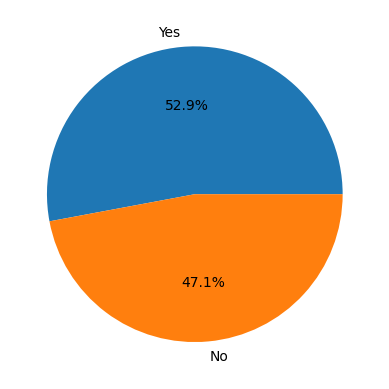

In [73]:

plt.pie(df['ASD_traits'].value_counts().values, labels=df['ASD_traits'].value_counts().index, autopct='%1.1f%%')
plt.show()



The dataset we have is  balanced.

**COLUMN SEGREGATION**

In [74]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)

In [75]:
ints

["CASE_NO_PATIENT'S",
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10_Autism_Spectrum_Quotient',
 'Age_Years',
 'Childhood Autism Rating Scale']

In [76]:
floats

['Social_Responsiveness_Scale', 'Qchat_10_Score']

In [77]:
objects

['Speech Delay/Language Disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Depression',
 'Global developmental delay/intellectual disability',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Sex',
 'Ethnicity',
 'Jaundice',
 'Family_mem_with_ASD',
 'Who_completed_the_test',
 'ASD_traits']

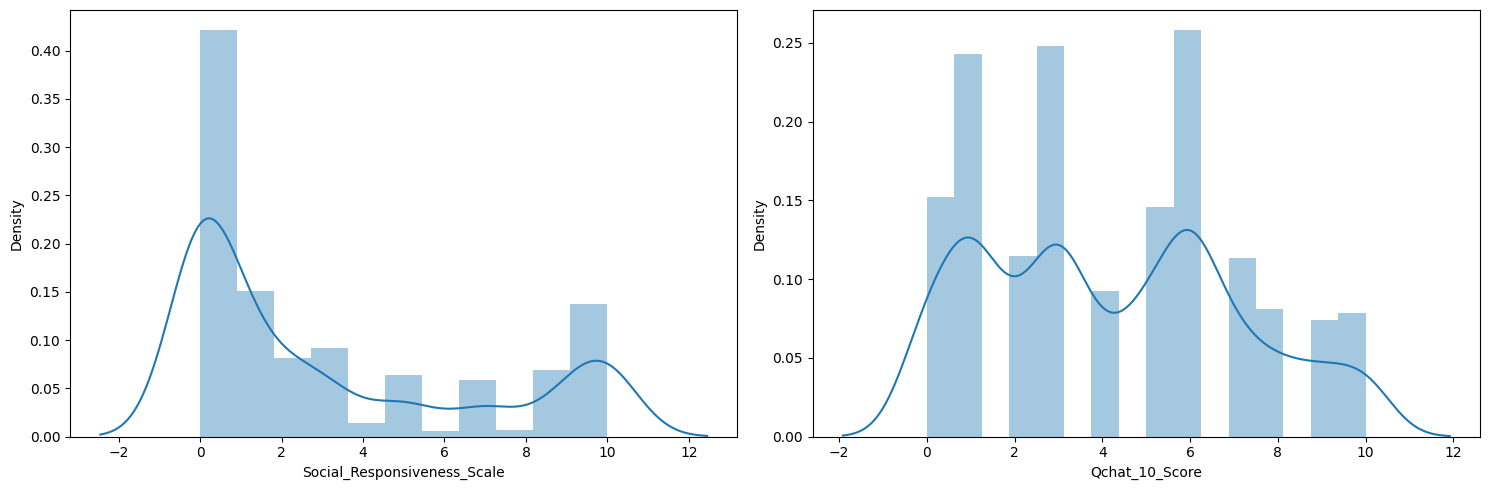

In [79]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()

The data appears roughly symmetrical

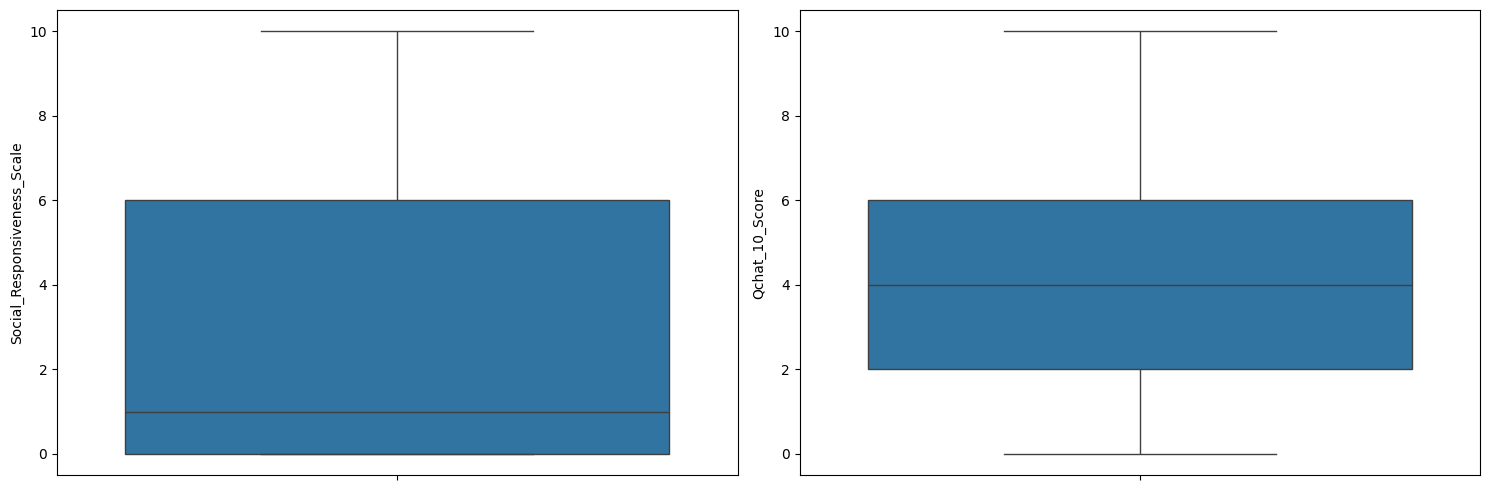

In [80]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col])
plt.tight_layout()
plt.show()

FEATURE ENGINEERING

In [81]:
def chi2_calc(df,target):
    scores=[]
    for col in df.columns:
        ct=pd.crosstab(df[col],target)
        stat,p,dof,expected=chi2_contingency(ct)
        scores.append(p)
    return pd.DataFrame(scores, index=df.columns, columns=['P value']).sort_values(by='P value')

In [82]:
chi2_calc(df, df['ASD_traits'])

,P value
ASD_traits,0.000000e+00
Qchat_10_Score,8.820962e-211
Ethnicity,6.612117e-169
A6,9.975092e-115
A9,1.373640e-113
A7,2.057805e-113
A5,9.400639e-110
A1,8.679372e-98
A4,9.144577e-98
A2,3.984251e-86


In [83]:
relevant_features_df = chi2_calc(df, df['ASD_traits'])
relevant_features = relevant_features_df[relevant_features_df['P value'] < 0.05].index.tolist()
relevant_features

['ASD_traits',
 'Qchat_10_Score',
 'Ethnicity',
 'A6',
 'A9',
 'A7',
 'A5',
 'A1',
 'A4',
 'A2',
 'A8',
 'A3',
 'Sex',
 'Global developmental delay/intellectual disability',
 'Speech Delay/Language Disorder',
 'Depression',
 'Social/Behavioural Issues',
 'Anxiety_disorder',
 'Learning disorder',
 'Genetic_Disorders',
 'Social_Responsiveness_Scale',
 'Childhood Autism Rating Scale',
 'Family_mem_with_ASD',
 'Jaundice',
 'A10_Autism_Spectrum_Quotient',
 'Who_completed_the_test']

In [84]:
features = [
 'ASD_traits',
 'Qchat_10_Score',
 'Ethnicity',
 'A9',
 'A6',
 'A7',
 'A5',
 'A1',
 'A4',
 'A2',
 'A8',
 'Sex',
 'A3',
 'Global developmental delay/intellectual disability',
 'Speech Delay/Language Disorder',
 'Depression',
 'Anxiety_disorder',
 'Social/Behavioural Issues',
 'Learning disorder',
 'Genetic_Disorders',
 'Social_Responsiveness_Scale',
 'Family_mem_with_ASD',
 'Childhood Autism Rating Scale',
 'Jaundice',
 'Who_completed_the_test',
 'A10_Autism_Spectrum_Quotient',
 'Age_Years'
]


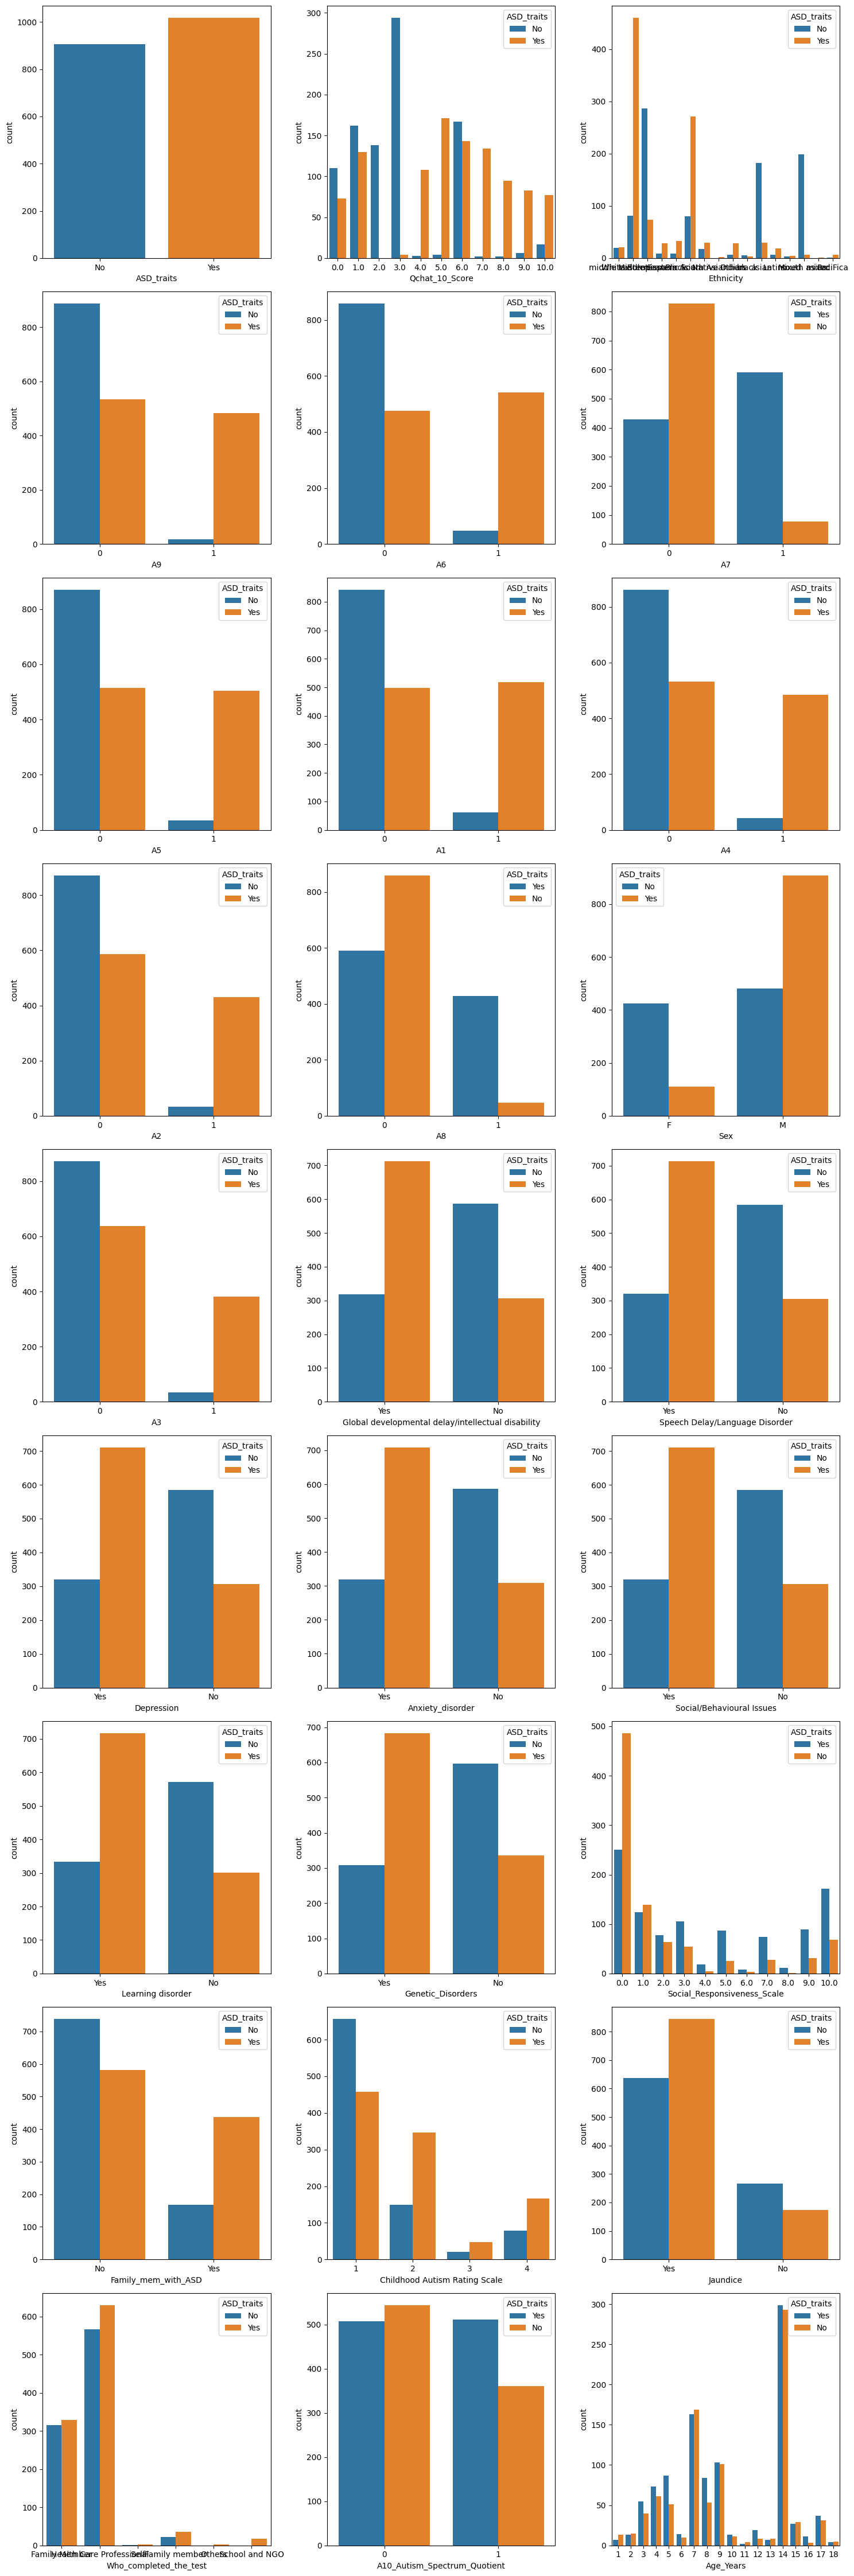

In [85]:
n_cols = 3
n_rows = - (-len(features)//n_cols)

plt.figure(figsize=(15, 5*n_rows))
for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=col, hue='ASD_traits', data=df)

plt.tight_layout()
plt.show()

From these plots, we can conclude that the persons with different dissorders are more likely to have autism. And Autism is morely diagnosed at the age between 7 and 14.

Binning

In [86]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['Age_Years'].apply(convertAge)


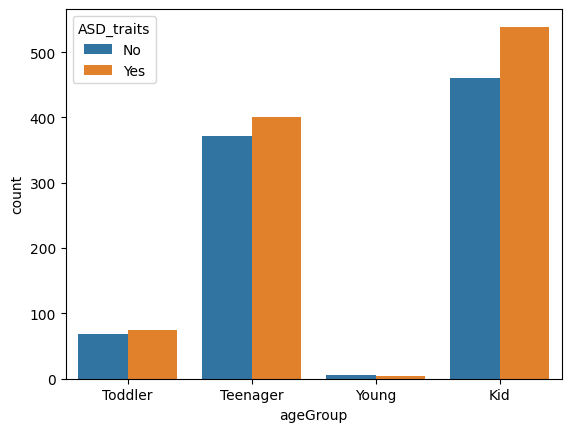

In [87]:
sns.countplot(x=df['ageGroup'], hue=df['ASD_traits'])
plt.show()


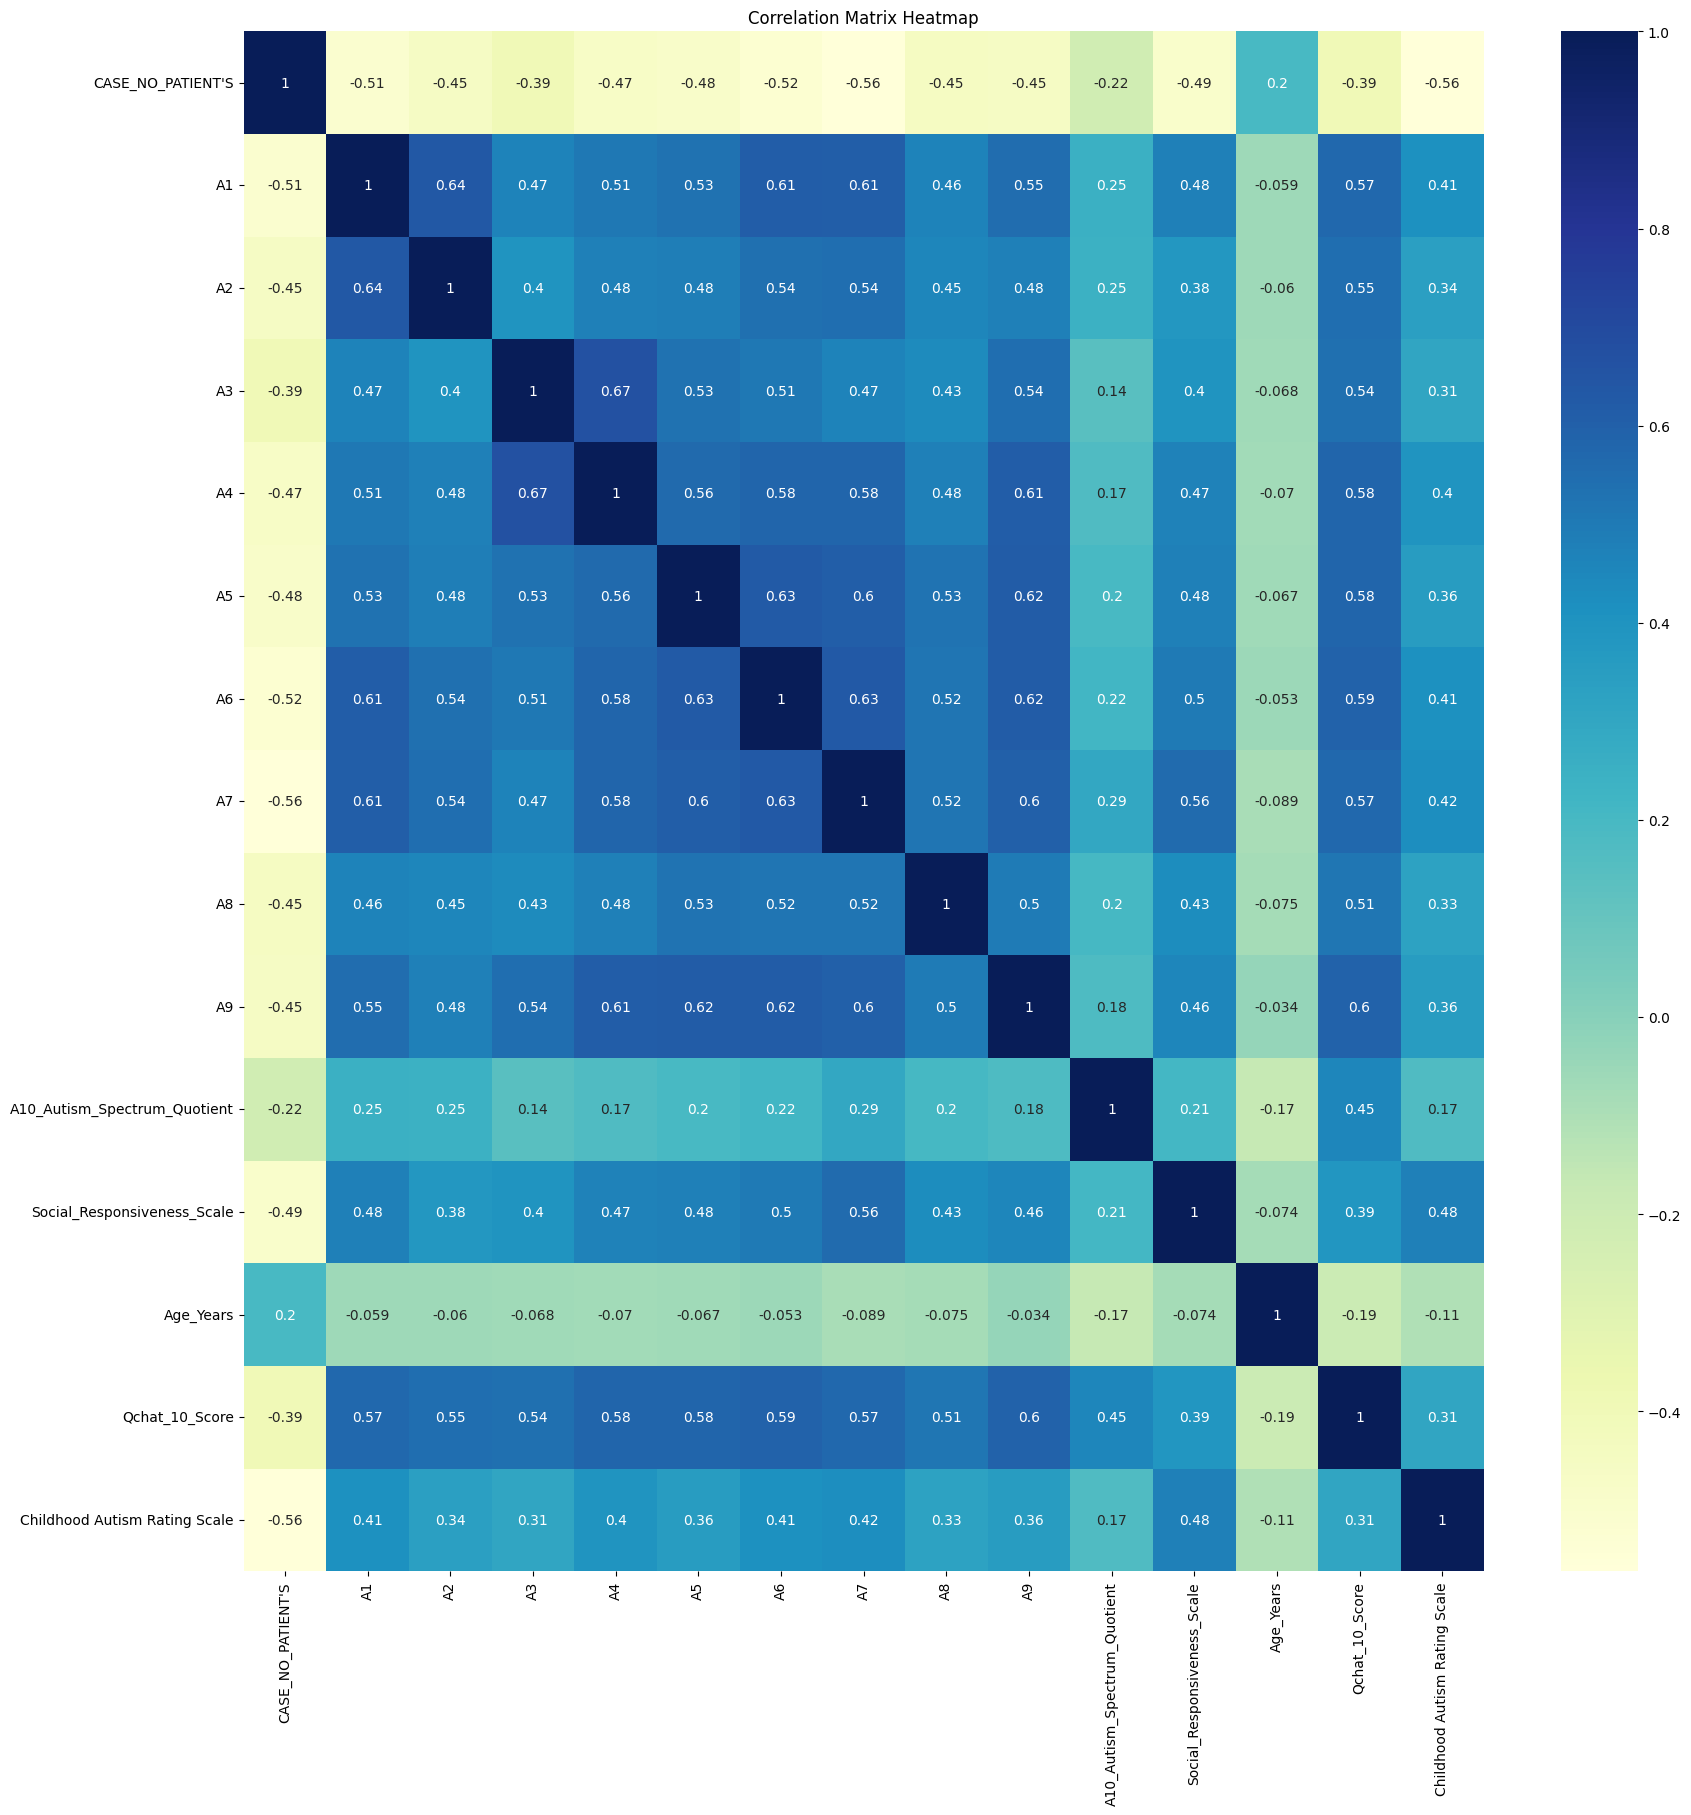

In [88]:
from sklearn.preprocessing import LabelEncoder

# Generate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

MODEL TRAINING

In [89]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to be label encoded
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [91]:
from sklearn.metrics import accuracy_score
X = df.drop('ASD_traits', axis=1)
y = df['ASD_traits']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [92]:
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f'{model} :')
    print('Training Accuracy : ', train_accuracy)
    print('Testing Accuracy : ', test_accuracy)


LogisticRegression() :
Training Accuracy :  0.8966189856957087
Testing Accuracy :  0.8597402597402597
DecisionTreeClassifier() :
Training Accuracy :  1.0
Testing Accuracy :  0.9714285714285714
SVC() :
Training Accuracy :  0.6775032509752926
Testing Accuracy :  0.6545454545454545


MODEL EVALUATION

In [93]:
from sklearn.metrics import precision_score, recall_score, f1_score

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'{model} :')
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)


LogisticRegression() :
Precision:  0.9
Recall:  0.8411214953271028
Accuracy:  0.8597402597402597
F1 Score:  0.8695652173913043
DecisionTreeClassifier() :
Precision:  0.9857142857142858
Recall:  0.9672897196261683
Accuracy:  0.974025974025974
F1 Score:  0.9764150943396227
SVC() :
Precision:  0.697560975609756
Recall:  0.6682242990654206
Accuracy:  0.6545454545454545
F1 Score:  0.6825775656324582


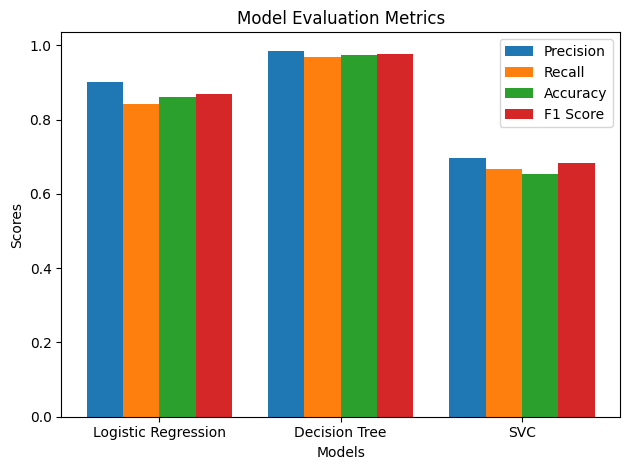

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate metrics
precisions = [precision_score(y_test, model.predict(X_test)) for model in models]
recalls = [recall_score(y_test, model.predict(X_test)) for model in models]
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
f1_scores = [f1_score(y_test, model.predict(X_test)) for model in models]
model_names = ['Logistic Regression', 'Decision Tree', 'SVC']

# Create grouped bar chart
x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - 1.5*width, precisions, width, label='Precision')
rects2 = ax.bar(x - 0.5*width, recalls, width, label='Recall')
rects3 = ax.bar(x + 0.5*width, accuracies, width, label='Accuracy')
rects4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

fig.tight_layout()

plt.show()


LogisticRegression() :
Training Accuracy :  0.8966189856957087
Testing Accuracy :  0.8597402597402597


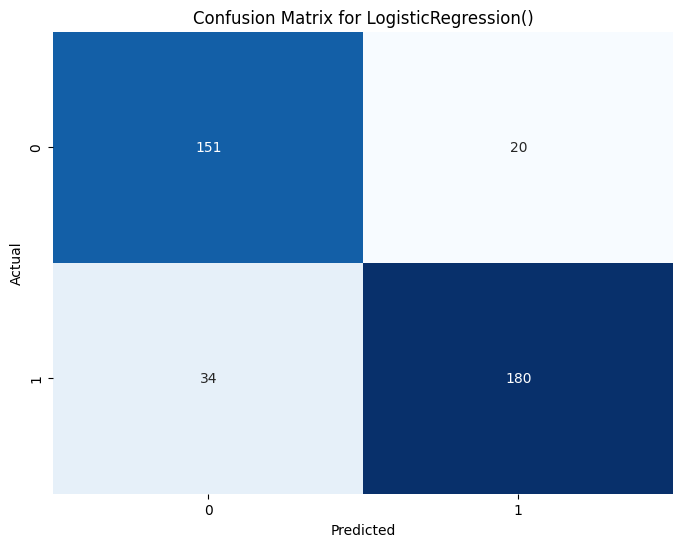

DecisionTreeClassifier() :
Training Accuracy :  1.0
Testing Accuracy :  0.9766233766233766


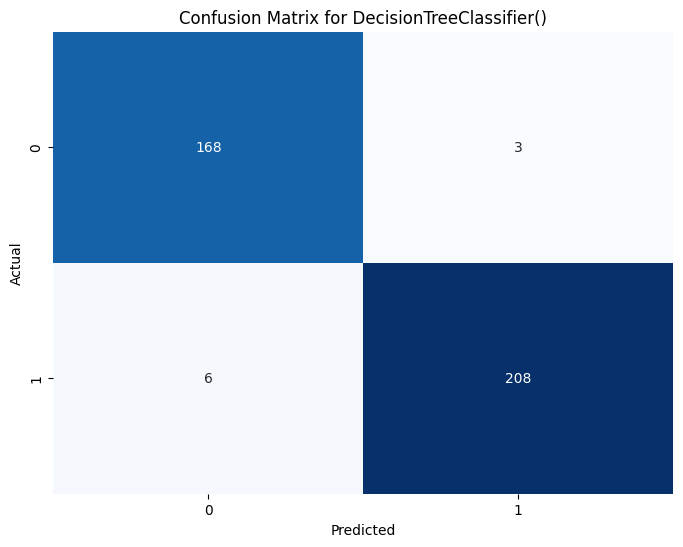

SVC() :
Training Accuracy :  0.6775032509752926
Testing Accuracy :  0.6545454545454545


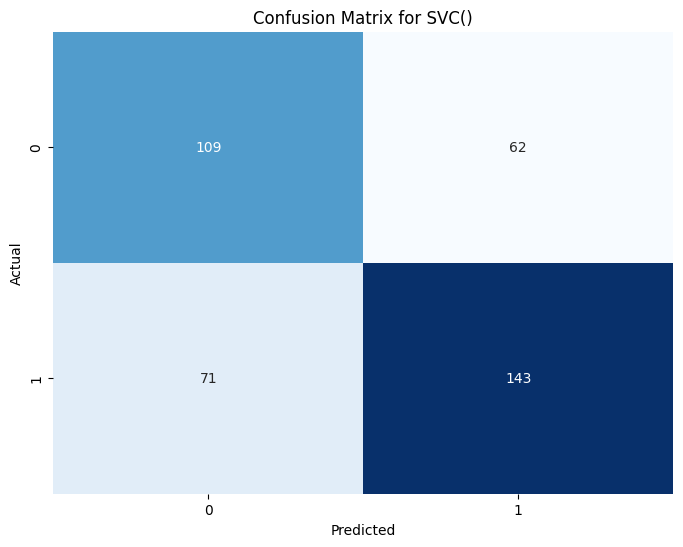

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = [LogisticRegression(), DecisionTreeClassifier(), SVC(kernel='rbf')]

for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f'{model} :')
    print('Training Accuracy : ', train_accuracy)
    print('Testing Accuracy : ', test_accuracy)

    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model}')
    plt.show()


**Feature Importance**

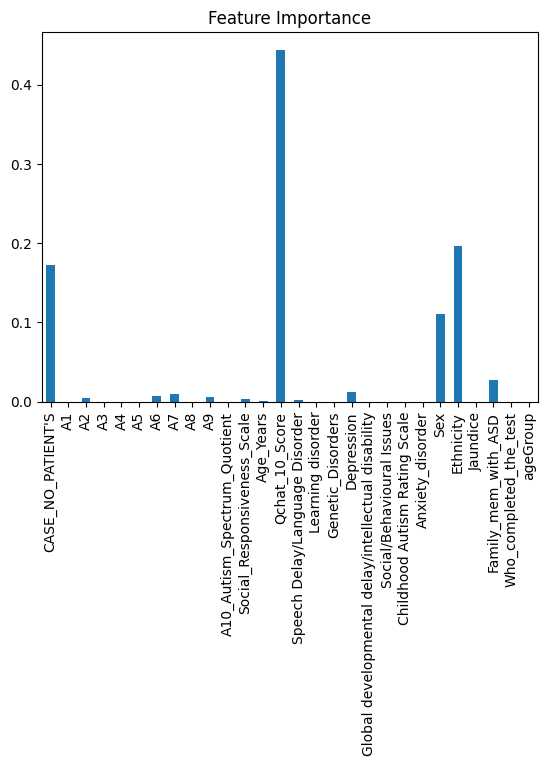

In [106]:
# Create and fit the decision tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Extract feature importances from the trained model
feature_importances = tree_model.feature_importances_

# Create a DataFrame for feature importances
features = pd.DataFrame(feature_importances, index=X_train.columns, columns=["Importance"])

# Plot the feature importances
features.plot.bar(title='Feature Importance', legend=False)
plt.show()

**Conclusion:**
The machine learning model we have created is around 97% accurate in Decision tree model. The disease for which there are no diagnostics methods machine learning models are able to predict whether the person has Autism or not. This is the power of machine learning by using which many of the real-world problems are being solved.


